In [1]:
#                   imports
# =============================================================================

import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from IPython.display import clear_output

transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5), (0.5))])

train_set = MNIST(root='./MNIST', train=True, download=True, transform=transform)
test_set = MNIST(root='./MNIST', train=False, download=True, transform=transform)

batch_size = 64
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2)

clear_output()


Набор данных MNIST (англ. Modified National Institute of Standards and Technology) представляет собой модельный набор данных с изображениями рукописных цифр, который часто используется для обучения и оценки качества работы ML моделей классификации изображений.

Датасет состоит из  60000  тренировочных и  10000  тестовых изображений. Все изображения имеют одинаковый квадратный размер  28×28  пикселей и единственный цветовой канал. Рукописные изображения цифр имеют равный размер и располагаются в центре кадра. Кроме того, все изображения имеют одинаковую яркость. Всего датасет содержит 10 классов изображений -- цифры от  0  до  9.

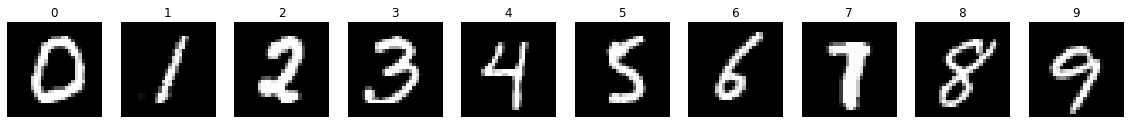

In [2]:
#                   dataset's visualization
# =============================================================================

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np

x_train = train_set.data.numpy() # images
y_train = train_set.targets.numpy() # labels
labels_names = list(map(str, range(10)))
plt.figure(figsize = (20.0, 20.0))  
for i in range(10):  # for all classes (0 to 9)
  label_indexes = np.where(y_train == i)[0] # get indexes for each class 
  index = np.random.choice(label_indexes)
  img = x_train[index]

  plt.subplot(1, 10, i + 1)  
  plt.title(labels_names[i])  
  plt.axis("off")  
  imshow(img,cmap='gray')  

Наследование nn.Model


In [3]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128) 
        self.fc2 = nn.Linear(128, 10)
        self.activation = nn.ReLU()

    def forward(self, x): # Called inside __call__ method
        x = x.view(-1, 28*28) # "reshape" image to vector
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        return x

Наследование nn.Sequential

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
                                     nn.Linear(28*28, 128),
                                     nn.ReLU(),
                                     nn.Linear(128, 10)
                                    )
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.layers(x)
        return x


def calaculate_accuracy(model, data_loader):
    correct, total = 0, 0 
    with torch.no_grad(): 
        for batch in data_loader: # get batch
            imgs, labels = batch # parse batch
            pred = model(imgs) # get output
            _, predicted = torch.max(pred.data, 1) # get predicted class
            total += labels.size(0) # all examples
            correct += (predicted == labels).sum().item() # correct predictions 
    return correct / total 


model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

from tqdm import trange

num_epochs = 10
loss_hist = [] # for plotting
epochs = trange(num_epochs)
for epoch in epochs:
    hist_loss = 0
    for _, batch in enumerate(train_loader, 0): # get batch
        # обрабатываем batch 
        imgs, labels = batch
        # Зануляем градиенты
        optimizer.zero_grad() 
        # получаем выходы сети
        pred = model(imgs) 
        # вычисляем loss
        loss = criterion(pred, labels)
        # вычисляем градиенты
        loss.backward() 
        # выполняем один шаг оптимизатора (обновляем параметры сети)
        optimizer.step()
        hist_loss += loss.item()
    loss_hist.append(hist_loss / len(train_loader))
    epochs.set_description(f"Epoch={epoch}  loss={loss_hist[epoch]:.4}")

acc_train = round(calaculate_accuracy(model, train_loader), 2)
print(f"Accuracy train = {acc_train}")
acc_test = calaculate_accuracy(model, test_loader)
print(f"Accuracy test = {acc_test}")

Epoch=9  loss=0.407: 100%|██████████| 10/10 [01:25<00:00,  8.52s/it]


Accuracy train = 0.89
Accuracy test = 0.896


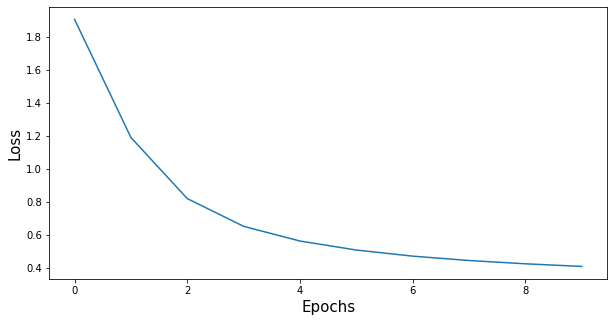

In [5]:
plt.figure(figsize = (10, 5))
plt.plot(range(num_epochs), loss_hist)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.show()

## 1
Дополнение архитектуры нейросети. Построение модели нейронной сети, состоящей из трех полносвязных слоев, два из которых размера 128 с функцией активации ReLU, третий 10.
Результат - значение **Accuracy test**.

In [6]:
class Net_Big(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
                                    nn.Linear(28*28,128),
                                    nn.ReLU(),
                                    nn.Linear(128,128),
                                    nn.ReLU(),
                                    nn.Linear(128,10)
                                    )
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.layers(x)
        return x

torch.manual_seed(0)
np.random.seed(0)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
model = Net_Big()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
num_epochs = 10
loss_hist = [] # for plotting
epochs = trange(num_epochs)
for epoch in epochs:
    hist_loss = 0
    for _, batch in enumerate(train_loader, 0): # get batch
        # обрабатываем batch 
        imgs, labels = batch
        # Зануляем градиенты
        optimizer.zero_grad() 
        # получаем выходы сети
        pred = model(imgs) 
        # вычисляем loss
        loss = criterion(pred, labels)
        # вычисляем градиенты
        loss.backward() 
        # выполняем один шаг оптимизатора (обновляем параметры сети)
        optimizer.step()
        hist_loss += loss.item()
    loss_hist.append(hist_loss / len(train_loader))
    epochs.set_description(f"Epoch={epoch}  loss={loss_hist[epoch]:.4}")

acc_train = round(calaculate_accuracy(model, train_loader), 2)
print(f"Accuracy train = {acc_train}")
acc_test = calaculate_accuracy(model, test_loader)
print(f"Accuracy test = {acc_test}")

Epoch=9  loss=0.4296: 100%|██████████| 10/10 [01:27<00:00,  8.72s/it]


Accuracy train = 0.88
Accuracy test = 0.8888


In [7]:
#                  visualize the result
# =============================================================================

# get batch
imgs, labels = next(iter(test_loader))
print('imgs shape: ', imgs.shape)

imgs shape:  torch.Size([64, 1, 28, 28])


In [8]:
# get output
pred = model(imgs)
print('pred shape: ', pred.shape)

pred shape:  torch.Size([64, 10])


In [9]:
# First sample in prediction batch
pred[0]

tensor([ 0.1652, -2.6830, -0.2799,  2.8485, -0.9434,  0.4135, -6.6109,  9.6454,
        -0.7773,  4.4700], grad_fn=<SelectBackward0>)

In [10]:
# Calculate probabilities
nn.Softmax(dim=0)(pred[0].detach())


tensor([7.5812e-05, 4.3934e-06, 4.8577e-05, 1.1094e-03, 2.5018e-05, 9.7178e-05,
        8.6477e-08, 9.9300e-01, 2.9540e-05, 5.6144e-03])

In [11]:
# remove axis
imgs = torch.reshape(imgs, (64, 28, 28))
print('imgs shape(after reshape): ', imgs.shape)

imgs shape(after reshape):  torch.Size([64, 28, 28])


In [12]:
# take 10 first images
imgs = imgs[:10]
print('imgs shape: ', imgs.shape)

imgs shape:  torch.Size([10, 28, 28])


In [13]:
pred = pred[:10].detach()
print('Prediction(1 sample):\n', pred[0])
digits = np.argmax(pred.numpy(), axis=1)
print('Predicted class: ', digits[0])

Prediction(1 sample):
 tensor([ 0.1652, -2.6830, -0.2799,  2.8485, -0.9434,  0.4135, -6.6109,  9.6454,
        -0.7773,  4.4700])
Predicted class:  7


Визуализируем изображения, подпишем предсказанное и истинное значение:

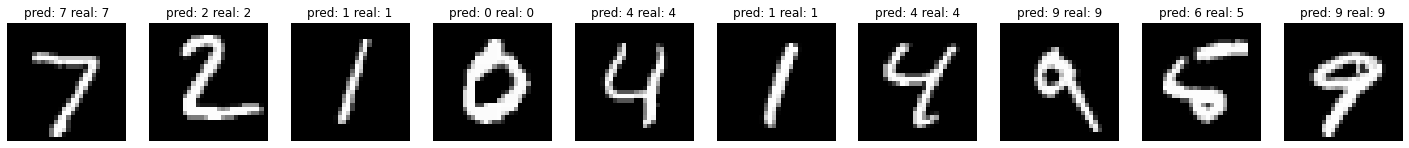

In [14]:
plt.figure(figsize = (25.0, 25.0))
for i in range(10):
  img = imgs[i]

  plt.subplot(1, 10, i + 1)
  plt.title('pred: ' + str(digits[i]) + ' real: '+str(labels[i].numpy())) # predicted and real values
  plt.axis("off")
  imshow(img.numpy(),cmap='gray') 